# Data Visualisation

## 3 - Shared and population-specific variation

In [7]:
# Change working directory

import os
os.chdir(r"C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_SAHGP_14032023\Genomic_data_analysis\Analysis")

In [8]:
# Import modules and packages

import pandas as pd
import upsetplot
from matplotlib import pyplot as plt

import sys

sys.path.append(
    r"C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_SAHGP_14032023\Genomic_data_analysis"
)
import Utils.constants as constants


In [9]:
# Import sub-population allele frequency data

ih_allele_counts = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "IH_allele_counts.csv",
    )
).drop(columns=["Unnamed: 0"])

In [10]:
# Add unique nomenclature for each variant
ih_allele_counts["UNIQUE_VARIANT_NAME"] = ih_allele_counts[["POS", "ALT", "REF"]].astype('str').agg('_'.join, axis=1)

Region intersections

In [11]:
# Group by variant and region. Remove rows with variants with alternate allele counts of 0. These variants are not present in the region.
region_specific_allele_counts = ih_allele_counts.groupby(by=["UNIQUE_VARIANT_NAME", "ID", "POS", "REF", "ALT", "VARIANT_TYPE", "GENE", "REG"]).sum()
region_specific_allele_counts = region_specific_allele_counts[~(region_specific_allele_counts.IH_ALT_CTS == 0)].drop(columns="CORR_IH_AF").reset_index()

# Drop rows with region set to African, Recent African, African American or African Caribbean
region_specific_allele_counts = region_specific_allele_counts[~((region_specific_allele_counts.REG == "Recent African") | (region_specific_allele_counts.REG == "African") | (region_specific_allele_counts.REG == "ACB") | (region_specific_allele_counts.REG == "ASW"))]

region_specific_allele_counts.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_368\1568438565.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_specific_allele_counts = ih_allele_counts.groupby(by=["UNIQUE_VARIANT_NAME", "ID", "POS", "REF", "ALT", "VARIANT_TYPE", "GENE", "REG"]).sum()


,UNIQUE_VARIANT_NAME,ID,POS,REF,ALT,VARIANT_TYPE,GENE,REG,IH_REF_CTS,IH_ALT_CTS,POP_ALLELE_COUNT,CORR_IH_REF_CTS
2,110148891_G_C,rs552586867,110148891,C,G,SNP,COL4A1,WA,1280,2,1282,1280
6,110148917_G_C,rs59409892,110148917,C,G,SNP,COL4A1,CA,75,5,80,75
7,110148917_G_C,rs59409892,110148917,C,G,SNP,COL4A1,EA,202,16,218,202
9,110148917_G_C,rs59409892,110148917,C,G,SNP,COL4A1,SA,31,3,76,73
10,110148917_G_C,rs59409892,110148917,C,G,SNP,COL4A1,WA,1153,129,1282,1153


In [12]:
# Generate a dictionary with lists of variants for each region
region_variant_dict = {}
for region in region_specific_allele_counts.REG.unique():
    region_variants = region_specific_allele_counts[region_specific_allele_counts.REG == region]["UNIQUE_VARIANT_NAME"].unique()
    region_variant_dict[region] = region_variants

# Generate a set with the union of all variants across the lists
all_variants = set()
for value in region_variant_dict.values():
    all_variants.update(value)

# Find overlap in values for each region
variant_overlap = pd.DataFrame()

for region in region_specific_allele_counts.REG.unique():
    region_variant_overlap = pd.DataFrame([[e in region_variant_dict[region]] for e in all_variants], columns = [region])
    variant_overlap = pd.concat([variant_overlap, region_variant_overlap], axis=1)

# Group values
variant_overlap_grouped = variant_overlap.groupby(by = variant_overlap.columns.tolist()).size()
variant_overlap_grouped.head(5)

WA     CA     EA     SA   
False  False  False  True     624
              True   False    739
                     True      72
       True   False  False    537
                     True      81
dtype: int64

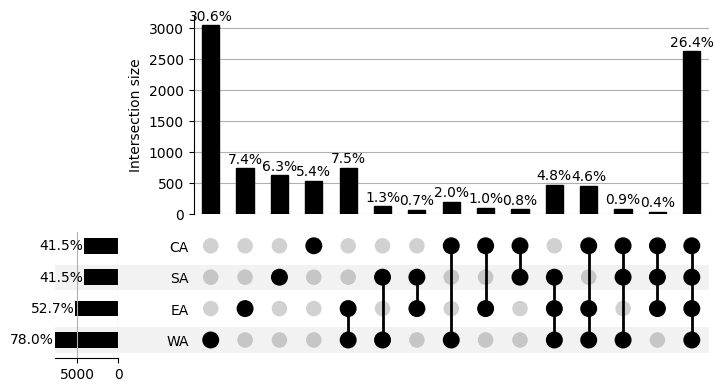

In [14]:
# Plot overlap of variants for each subpopulation 
upsetplot.plot(variant_overlap_grouped, show_percentages=True, orientation='horizontal', facecolor="black")
plt.savefig("..\Results\Figures\Shared_and_population_specific_variation.png", dpi=1200)
plt.show()

Southern Africa intersections

In [15]:
# Subset by Southern Africa subpopulations. Remove rows with variants with alternate allele counts of 0. These variants are not present in the subpopulations.
sa_allele_counts = ih_allele_counts[ih_allele_counts.REG == "SA"]
sa_allele_counts = sa_allele_counts[~(sa_allele_counts.IH_ALT_CTS == 0)].drop(columns="CORR_IH_AF").reset_index(drop=True)

# Rename subpopulations
sa_allele_counts = sa_allele_counts.replace({"SUB_POP": constants.SUBPOP_RENAME})

sa_allele_counts.head(5)

,ID,REF,ALT,IH_REF_CTS,IH_ALT_CTS,POP_ALLELE_COUNT,SUB_POP,REG,VARIANT_TYPE,CORR_IH_REF_CTS,POS,GENE,UNIQUE_VARIANT_NAME
0,chr11:34438889G-C,G,C,11,1,12,San,SA,SNP,11,34438889,CAT,34438889_C_G
1,chr11:34439312G-A,G,A,15,1,16,Bantu South Africa,SA,SNP,15,34439312,CAT,34439312_A_G
2,chr11:34440567C-CT,C,CT,12,2,16,Bantu South Africa,SA,INDEL,14,34440567,CAT,34440567_CT_C
3,chr11:34440567C-CT,C,CT,8,4,12,San,SA,INDEL,8,34440567,CAT,34440567_CT_C
4,chr11:34440567C-CTT,C,CTT,11,1,12,San,SA,INDEL,11,34440567,CAT,34440567_CTT_C


In [16]:
# Generate a dictionary with lists of variants for each region
sa_variant_dict = {}
for sub_pop in sa_allele_counts.SUB_POP.unique():
    sa_variants = sa_allele_counts[sa_allele_counts.SUB_POP == sub_pop]["UNIQUE_VARIANT_NAME"].unique()
    sa_variant_dict[sub_pop] = sa_variants

# Generate a set with the union of all variants across the lists
all_variants = set()
for value in sa_variant_dict.values():
    all_variants.update(value)

# Find overlap in values for each region
variant_overlap = pd.DataFrame()

for sub_pop in sa_allele_counts.SUB_POP.unique():
    sa_variant_overlap = pd.DataFrame([[e in sa_variant_dict[sub_pop]] for e in all_variants], columns = [sub_pop])
    variant_overlap = pd.concat([variant_overlap, sa_variant_overlap], axis=1)

# Group values
variant_overlap_grouped = variant_overlap.groupby(by = variant_overlap.columns.tolist()).size()
variant_overlap_grouped.head(5)

San    Bantu South Africa  Sotho  Xhosa  Coloured
False  False               False  False  True        290
                                  True   False       192
                                         True         51
                           True   False  False       219
                                         True         47
dtype: int64

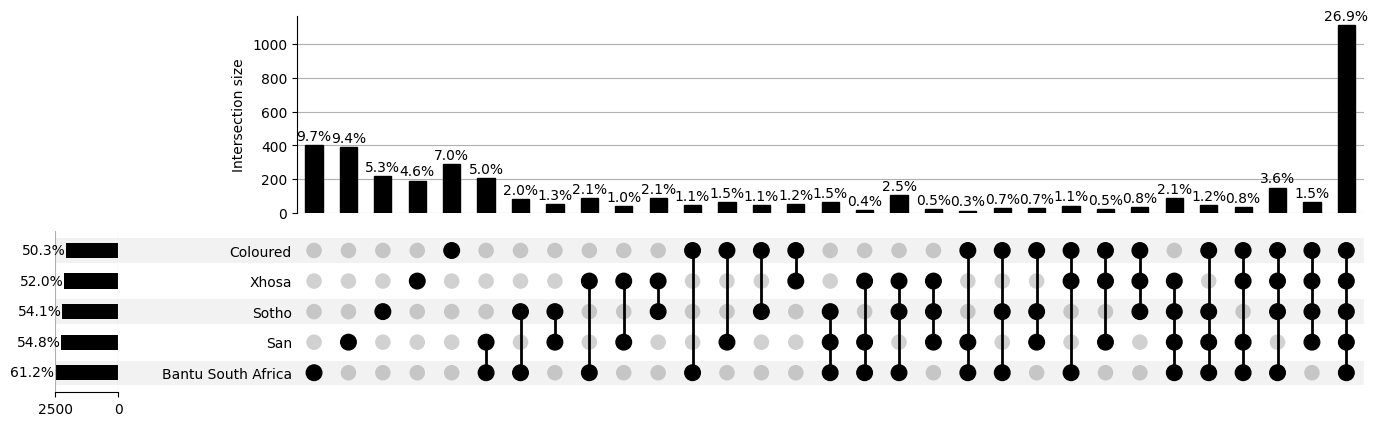

In [17]:
# Plot overlap of variants for each subpopulation 
upsetplot.plot(variant_overlap_grouped, show_percentages=True, orientation='horizontal', facecolor="black")
plt.savefig("..\Results\Figures\Shared_and_population_specific_variation_SA.png", dpi=1200)
plt.show()